In [29]:
#Import libraries
import tensorflow as tf
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt

In [2]:
#Import libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
#Declare tuple for training and testing
 (x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [4]:
#Scaling - v imp
x_train = x_train/255 #Scaling/Normalisisng the data.
x_test = x_test/255


In [5]:
#Create the Neural network - Defining the model

model = Sequential()

In [6]:
#Defining the layers
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           4,710 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              40 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,771 (18.64 KB)

 Trainable params: 4,771 (18.64 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Comoiling the model
model.compile(
    optimizer = 'RMSProp',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
#Running the model
history = model.fit(x_train, y_train, epochs = 15, batch_size=32)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4338 - loss: 1.5889
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7994 - loss: 0.7350
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8312 - loss: 0.6245
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8403 - loss: 0.5711
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8514 - loss: 0.5302
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8578 - loss: 0.5127
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.5029
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8624 - loss: 0.4914
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8652 - loss: 0.4892
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8694 - loss: 0.4646
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8694 - loss: 0.4703
Epoch 12/15
1875/1875 ━━━━━━━━

In [9]:
#Ceating a dictionary of the accuracy and loss per epoch
h = history.history

Text(0.5, 0, 'epochs')

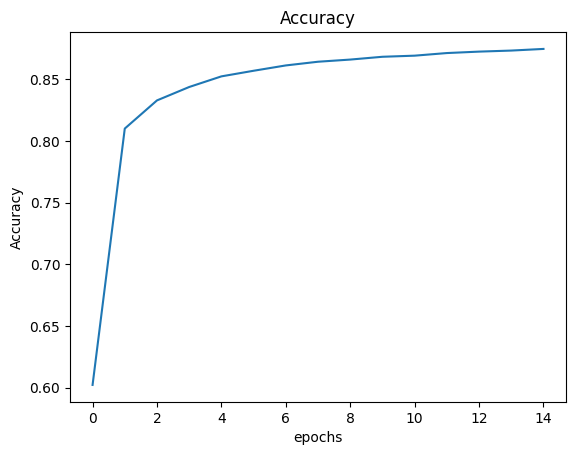

In [10]:
#Plotting the accuracy
plt.title('Accuracy')
plt.plot(h['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epochs')

In [27]:
#Predicting the results
#Note: In neural networks, after performing a prediction, the output is typically a probability distribution over classes.
#Thus we take index of the best prob
y_pred= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
y_pred[233] #As mentioned above, each class has a prob value atatched to it. Hence 10 values below are 10 prob values and we take index of maximum as answer!

array([0.00292336, 0.00000074, 0.00441605, 0.24889621, 0.00000089,
       0.1407686 , 0.00000003, 0.59002405, 0.00104341, 0.01192661],
      dtype=float32)

<BarContainer object of 10 artists>

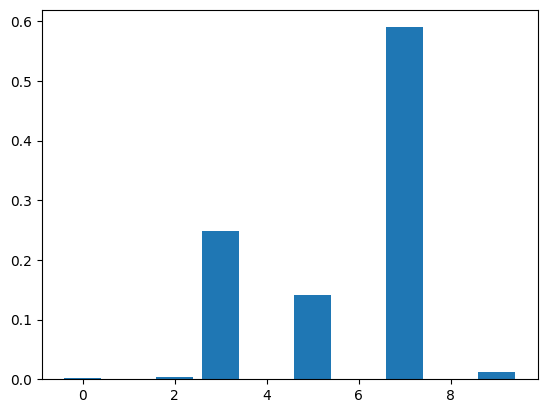

In [42]:
plt.bar(range(0,10), y_pred[233])

In [85]:
#Checking rnage of values in x_test
not_in = []
x = [not_in.append(i) for i in y_train if i not in not_in]
sorted(not_in)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [81]:
#Another way
not_in = []
for i in y_train:
  if i not in not_in:
    not_in.append(i)
sorted(not_in)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<BarContainer object of 10 artists>

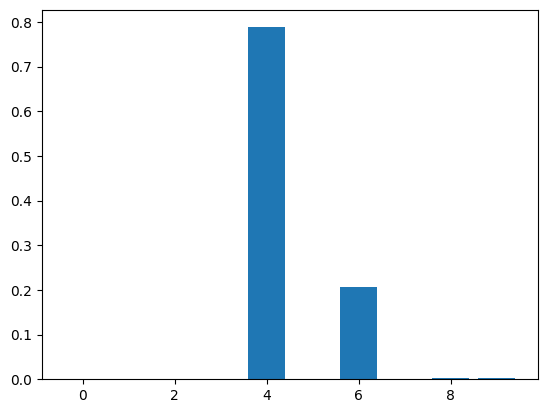

In [78]:
plt.bar(range(0,10), y_pred[22])

In [15]:
np.argmax(y_pred[233])

7

Text(0.5, 1.0, 'Prediction:1')

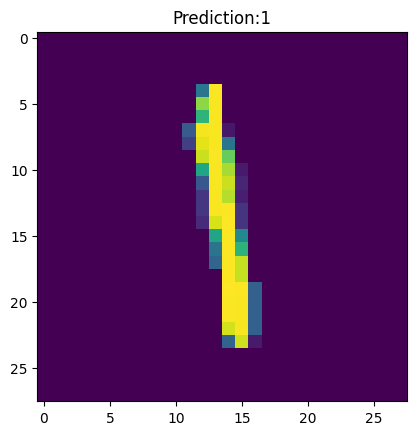

In [26]:
#Manually check a few results
plt.imshow(x_test[145])
plt.title(f'Prediction:{np.argmax(y_pred[145])}')

array([[8.0421332e-06, 1.7740538e-10, 6.8616869e-06, ..., 9.8179388e-01,
        4.6785297e-07, 7.1533024e-03],
       [4.8197766e-08, 5.6277253e-12, 9.9988240e-01, ..., 6.1934755e-19,
        2.6976504e-05, 5.0471275e-33],
       [6.7423876e-05, 9.7934777e-01, 5.2275951e-03, ..., 1.9635702e-03,
        9.7005041e-03, 3.3261321e-04],
       ...,
       [8.2817751e-06, 9.8458918e-07, 1.6479748e-07, ..., 3.8066279e-05,
        1.5254832e-05, 1.5734188e-01],
       [5.4383850e-01, 1.1855520e-07, 7.2224108e-03, ..., 7.3614325e-07,
        2.5384814e-01, 4.0100247e-05],
       [2.0600094e-08, 2.9550872e-14, 4.8940961e-14, ..., 7.7512320e-28,
        6.1306844e-07, 1.3506029e-16]], dtype=float32)

In [70]:
print('Actual Label:', y_test[0])
print('Prediction:', np.argmax(y_pred[0]))
print('Predicted array of Probabilities: \n', y_pred[0])

Actual Label: 7
Prediction: 7
Predicted array of Probabilities: 
 [0.00000804 0.         0.00000686 0.00602228 0.00000001 0.00501508
 0.         0.9817939  0.00000047 0.0071533 ]


Text(0.5, 1.0, 'Prediction: 6')

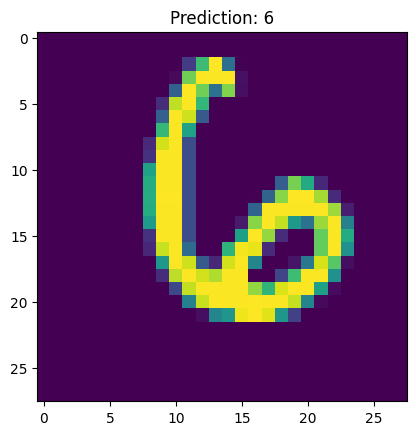

In [73]:
plt.imshow(x_test[88])
plt.title(f'Prediction: {np.argmax(y_pred[88])}')